In [39]:
#python libraries
import os, sys
import numpy as np               # for handling arrays
import h5py as h5                # for reading the COMPAS data
import time                      # for finding computation time
import matplotlib.pyplot as plt  #for plotting

# Import COMPAS specific scripts
# compasRootDir = os.environ['COMPAS_ROOT_DIR']
# sys.path.append(compasRootDir + 'postProcessing/PythonScripts')
from COMPAS.misc.unsupported_utils.compasUtils import printCompasDetails, getEventHistory, getEventStrings

# Choose an output hdf5 file to work with
pathToData = 'COMPAS_Output/COMPAS_Output.h5'

# This is known as an ipython magic command, and allows plots to be produced within the notebook
%matplotlib inline

In [40]:
Data  = h5.File(pathToData)
print(list(Data.keys()))

['BSE_Common_Envelopes', 'BSE_Double_Compact_Objects', 'BSE_RLOF', 'BSE_Supernovae', 'BSE_System_Parameters', 'Rates_mu00.025_muz-0.049_alpha-1.778_sigma00.036_sigmaz0.006', 'Run_Details']


In [41]:
SPs = Data['BSE_System_Parameters']
MTs = Data['BSE_RLOF']
CEs = Data['BSE_Common_Envelopes']
SNe = Data['BSE_Supernovae']
DCs = Data['BSE_Double_Compact_Objects']
Rates = Data['Rates_mu00.025_muz-0.049_alpha-1.778_sigma00.036_sigmaz0.006']
print(SPs.keys())
print(Rates.keys())


<KeysViewHDF5 ['CE_Alpha', 'CH_on_MS(1)', 'CH_on_MS(2)', 'Eccentricity@ZAMS', 'Equilibrated_At_Birth', 'Error', 'Evolution_Status', 'LBV_Factor', 'Mass@ZAMS(1)', 'Mass@ZAMS(2)', 'Merger', 'Merger_At_Birth', 'Metallicity@ZAMS(1)', 'Metallicity@ZAMS(2)', 'Omega@ZAMS(1)', 'Omega@ZAMS(2)', 'Record_Type', 'SEED', 'SN_Kick_Magnitude_Random_Number(1)', 'SN_Kick_Magnitude_Random_Number(2)', 'SemiMajorAxis@ZAMS', 'Sigma_Kick_CCSN_BH', 'Sigma_Kick_CCSN_NS', 'Sigma_Kick_ECSN', 'Sigma_Kick_USSN', 'Stellar_Type(1)', 'Stellar_Type(2)', 'Stellar_Type@ZAMS(1)', 'Stellar_Type@ZAMS(2)', 'Unbound', 'WR_Factor']>
<KeysViewHDF5 ['DCOmask', 'SEED', 'detection_rateO3', 'merger_rate', 'merger_rate_z0', 'redshifts']>


<HDF5 dataset "SEED": shape (328,), type "<u8">


[Text(0.5, 0, 'Primary Mass ($M_\\odot$)'), Text(0, 0.5, 'Merger Rate')]

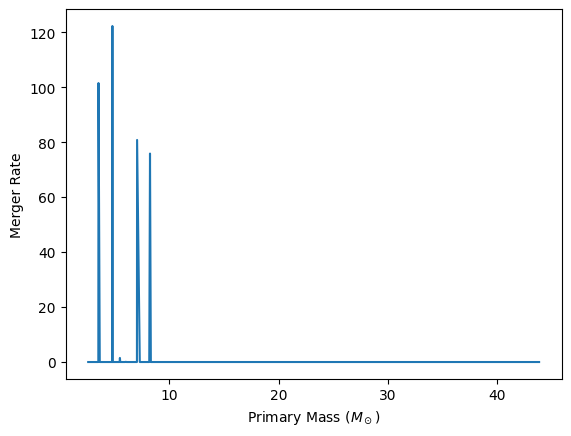

In [42]:
fig, ax = plt.subplots()
m1s = np.zeros(len(Rates['SEED']))
print(Rates['SEED'])
for i in range(len(m1s)):
    m1s[i] = DCs['Mass(1)'][np.array(DCs['SEED']) == Rates['SEED'][i]]
sort_inds = np.argsort(m1s)
m1s = m1s[sort_inds]
z0merg_rates = np.array(Rates['merger_rate_z0'])[sort_inds]
ax.plot(m1s, z0merg_rates)
ax.set(xlabel='Primary Mass ($M_\odot$)', ylabel='Merger Rate')


(328, 1000)


[Text(0.5, 0, 'Primary Mass ($M_\\odot$)'),
 Text(0, 0.5, 'Detectable Merger Rate')]

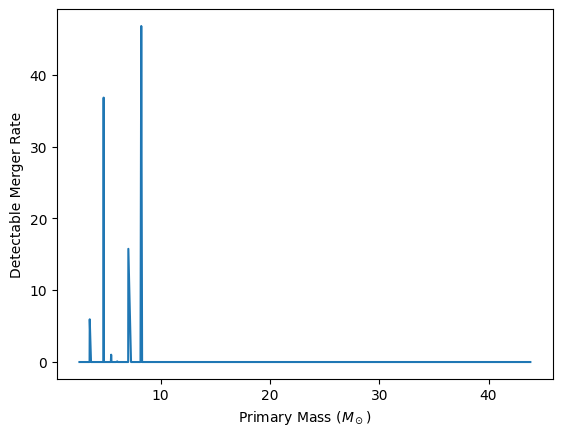

In [55]:
print(np.shape(Rates['detection_rateO3']))
fig, ax = plt.subplots()
det_merg_rates = np.array([sum(np.array(Rates['detection_rateO3'])[i, :]) for i in range(len(m1s))])
det_merg_rates = det_merg_rates[sort_inds]

ax.plot(m1s, det_merg_rates)
ax.set(xlabel='Primary Mass ($M_\odot$)', ylabel='Detectable Merger Rate')


[Text(0.5, 0, 'Redshift'), Text(0, 0.5, 'Merger Rate')]

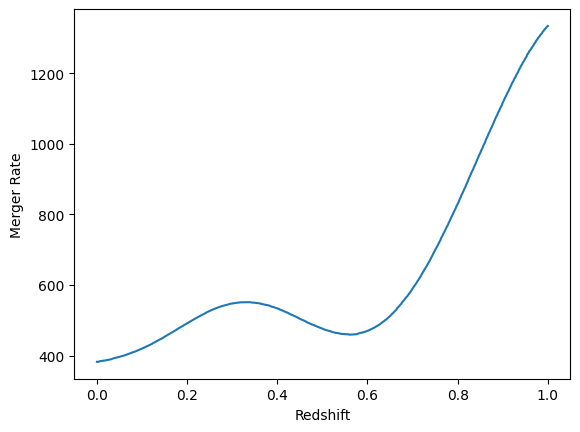

In [44]:
fig, ax = plt.subplots()
zs = np.linspace(0, 1, 1000)
z_rates = [sum(np.array(Rates['merger_rate'])[:, i]) for i in range(len(zs))]
ax.plot(zs, z_rates)
ax.set(xlabel='Redshift', ylabel='Merger Rate')

In [45]:
print(DCs.keys())

<KeysViewHDF5 ['Coalescence_Time', 'Eccentricity@DCO', 'Mass(1)', 'Mass(2)', 'Merges_Hubble_Time', 'Record_Type', 'Recycled_NS(1)', 'Recycled_NS(2)', 'SEED', 'SemiMajorAxis@DCO', 'Stellar_Type(1)', 'Stellar_Type(2)', 'Time']>


In [46]:
totMass = []
for i, seed in enumerate(DCs['SEED']):
    m1 = DCs['Mass(1)'][i]
    m2 = DCs['Mass(2)'][i]
    if m1 > 3 and m2 > 3:
        totMass.append(m1 + m2)
print(totMass)

[18.736573114615986, 78.5007121049269, 39.11531802745284, 84.86592599806399, 50.757888224130085, 22.864890842617832, 25.26730891908457, 34.97821983630823, 19.78023170094287, 32.46276435911635, 23.72836737915894, 50.59802826195505, 22.447895908973948, 21.38515735675636, 16.44387391642887, 20.796221730466776, 23.662368573155206, 32.61915292119655, 23.026229454113114, 52.428100223978284, 67.82831701581489, 77.40017999541845, 83.32307252147976, 37.71497455484498, 25.085938237056304, 25.481429907502843, 57.90867522803561, 25.348116659941926, 35.320027305274664, 29.163940102420934, 20.603926741696228, 54.80054760246975, 31.75605921228206, 20.106427483405724, 23.55143729392413, 27.123426505950107, 19.646122446178587, 44.866472683724815, 38.16683281558293, 35.382104200546294, 23.507384883390706, 41.729937245766905, 29.272414771112174, 18.394837704519087, 45.25230850647825, 24.758706823320708, 15.441908054584701, 18.478246879570023, 19.764291650893924, 55.4979260292139, 23.812625708624008, 56.8

(array([  6., 203., 680., 739., 659., 213., 154.,  98.,  60.,  48.,  55.,
         25.,  39.,  28.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]),
 array([  0.        ,   3.2676358 ,   6.5352716 ,   9.8029074 ,
         13.0705432 ,  16.338179  ,  19.60581479,  22.87345059,
         26.14108639,  29.40872219,  32.67635799,  35.94399379,
         39.21162959,  42.47926539,  45.74690119,  49.01453699,
         52.28217279,  55.54980859,  58.81744438,  62.08508018,
         65.35271598,  68.62035178,  71.88798758,  75.15562338,
         78.42325918,  81.69089498,  84.95853078,  88.22616658,
         91.49380238,  94.76143817,  98.02907397, 101.29670977,
        104.56434557, 107.83198137, 111.09961717, 114.36725297,
        117.63488877, 120.90252457, 124.17016037, 127.43779617,
        130.70543196, 13

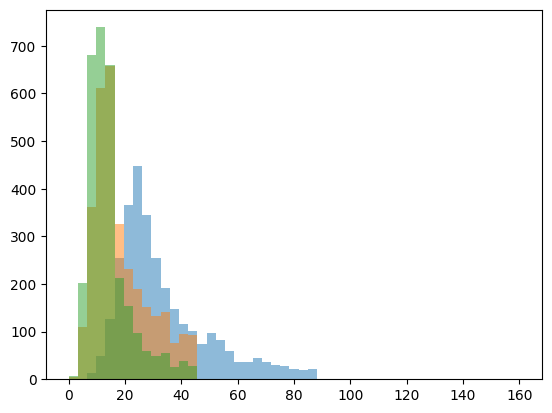

In [47]:
bins = np.linspace(0, max(totMass), 50)
fig, ax = plt.subplots()
ax.hist(totMass, bins=bins, alpha=0.5);
ax.hist(DCs['Mass(1)'][np.array(DCs['Mass(1)']) > 3], bins=bins, alpha=0.5)
ax.hist(DCs['Mass(2)'][np.array(DCs['Mass(2)']) > 3], bins=bins, alpha=0.5)

In [48]:
coTime = []
coTotMass = []
for i in range(len(DCs['Coalescence_Time'])):
    if DCs['Merges_Hubble_Time'][i]:
        print(DCs['Coalescence_Time'][i])
        coTime.append(DCs['Coalescence_Time'][i])
        coTotMass.append(DCs['Mass(1)'][i] + DCs['Mass(2)'][i])

403.2991642390275
57.74402945094198
32.281422465334316
225.3319090760186
26.990230426002405
57.36324768281078
21.870147397872287
291.84286069492185
43.376743504714305
6002.3799404568435
234.61047091865328
60.61085742310758
1057.4766506462688
7786.846811708987
77.47677241191727
228.55617776704935
150.98231752983588
339.1426459502514
1089.4553316987392
38.81064803117416
4898.93260775234
77.35844574909517
28.308473799095623
73.108066427029
680.3352399354047
127.59711251414681
170.5528411328393
6.6908989102551075
5.100884797640185
14.286132426777108
23.368174047918114
143.32273885374593
2.4670172248587647
225.52586954885848
924.8509071894831
906.2291676771927
128.10290363835276
30.61832111952319
4735.17393996749
47.80953487983801
23.951876318551967
367.9887984152354
107.61501057287616
3434.5051872405743
8.743327901294123
392.5590851776517
107.48902869535213
38.23151764920034
2108.896510644993
15.190605220645796
15.605664266482831
28.830848813211304
101.05805206486889
57.66641199983923
74.7

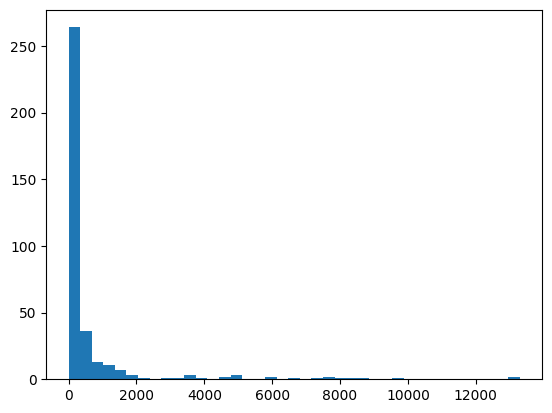

In [49]:
fig, ax = plt.subplots()
bins = np.linspace(0, max(coTime), 40)
ax.hist(coTime, bins=bins);

[None,
 Text(0.5, 0, 'Total System Mass ($M_\\odot$)'),
 Text(0, 0.5, 'Coalescence Time (Myr)')]

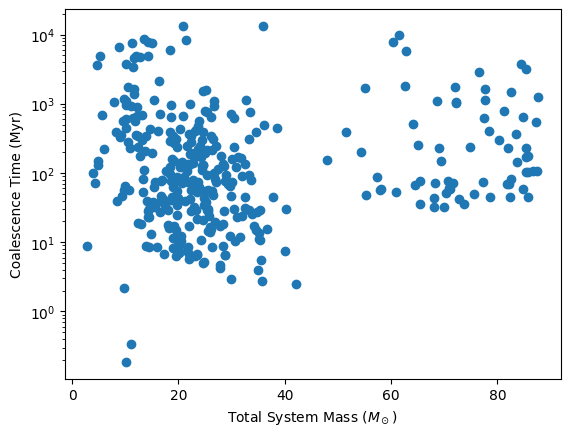

In [50]:
fig, ax = plt.subplots()
ax.scatter(coTotMass, coTime)
ax.set(yscale='log', xlabel="Total System Mass ($M_\odot$)", ylabel="Coalescence Time (Myr)")

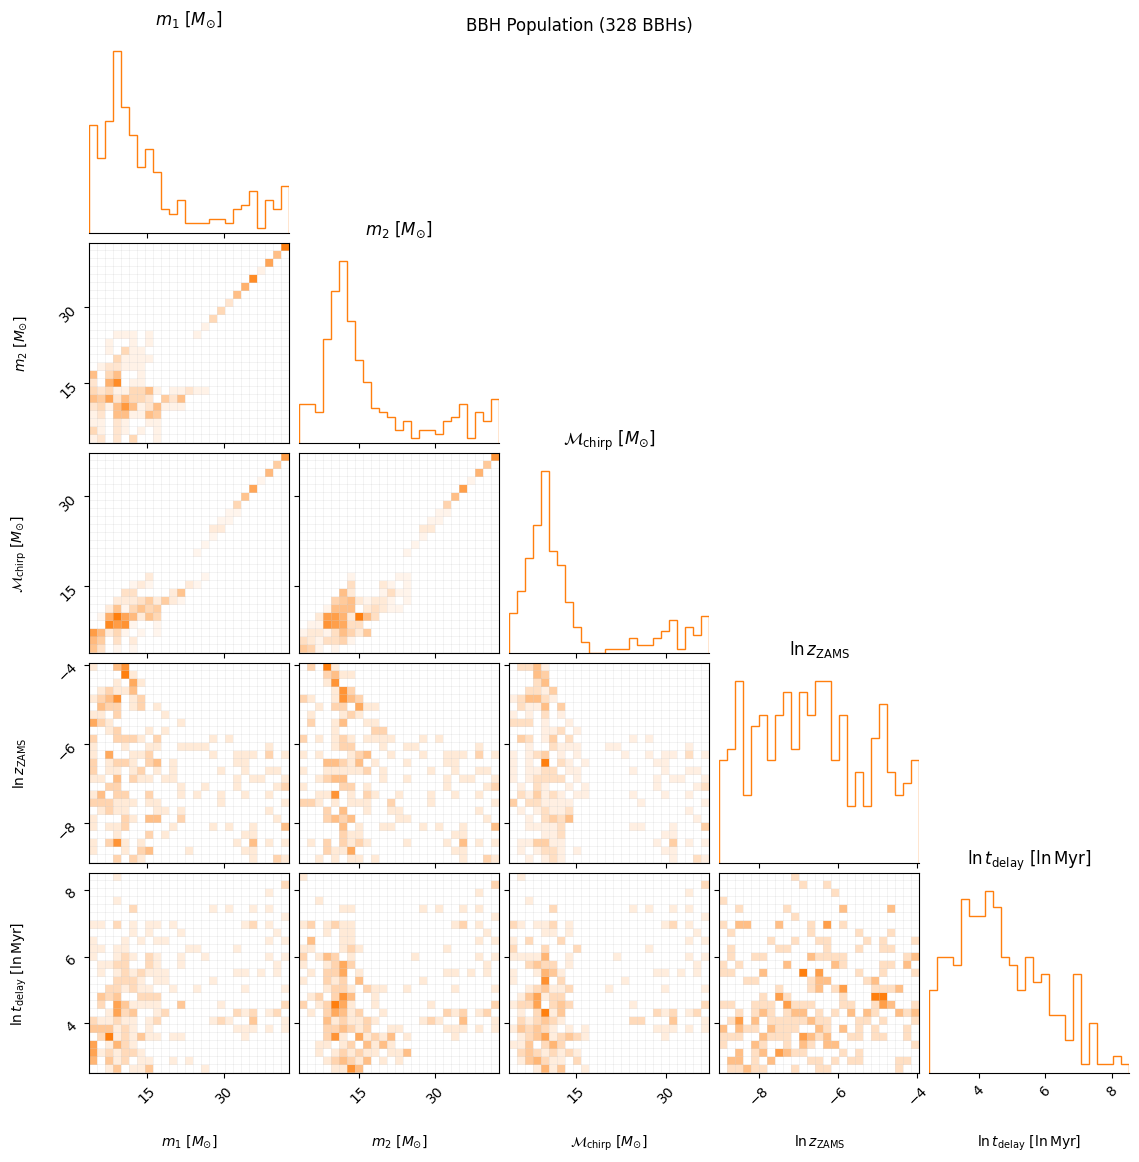

In [51]:
from compas_python_utils.cosmic_integration.binned_cosmic_integrator.bbh_population import BBHPopulation

bbh_population = BBHPopulation.from_compas_h5('COMPAS_Output/COMPAS_Output.h5', m1_min=5, m1_max=150, m2_min=0.1)
fig = bbh_population.plot()

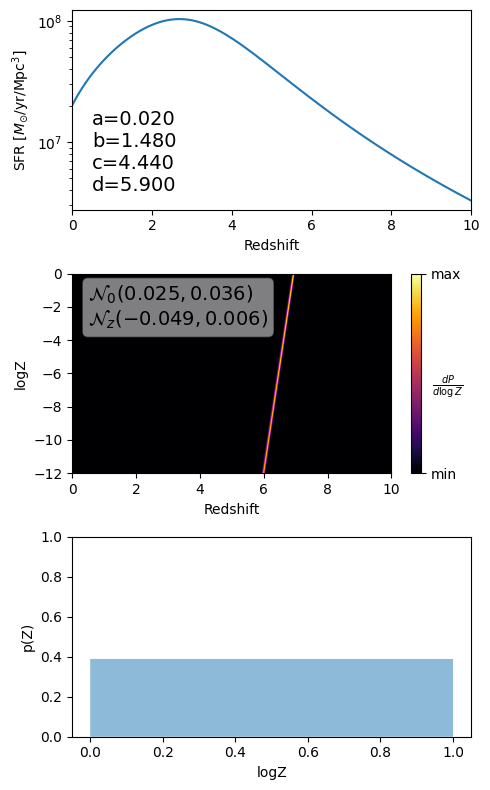

In [52]:
from compas_python_utils.cosmic_integration.binned_cosmic_integrator.cosmological_model import CosmologicalModel

cosmological_model = CosmologicalModel(
    aSF=0.02, bSF=1.48, cSF=4.44, dSF=5.90,
    mu_0=0.025, sigma_0=0.036, mu_z=-0.049, sigma_z=0.006, alpha=-1.778,
    min_observed_log_metallicity=-4,
    max_observed_log_metallicity=np.log10(0.037),
)

fig = cosmological_model.plot()

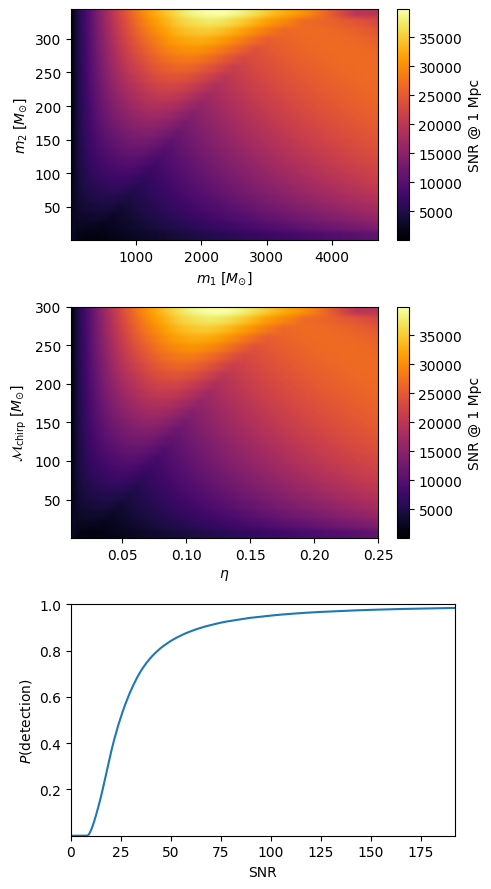

In [53]:
from compas_python_utils.cosmic_integration.binned_cosmic_integrator.snr_grid import SNRGrid

snr_grid = SNRGrid()
fig = snr_grid.plot()

Computing detection rates: 100%|██████████| 328/328 [00:00<00:00, 5050.73it/s]


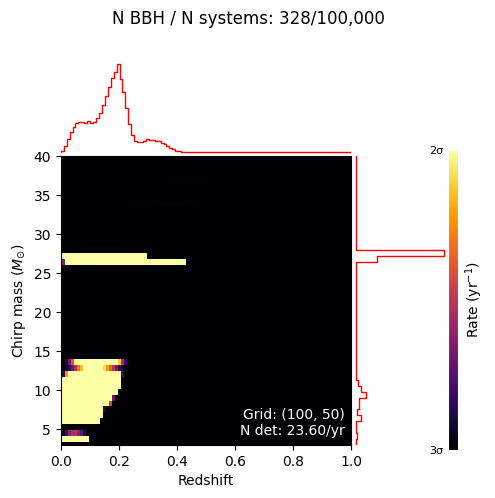

In [54]:
from compas_python_utils.cosmic_integration.binned_cosmic_integrator.detection_matrix import DetectionMatrix, compute_binned_detection_rates

rate_matrix = compute_binned_detection_rates(
    bbh_population, cosmological_model, snr_grid,
    chirp_mass_bins=np.linspace(3,40, 20),
    redshift_bins=np.linspace(0, 1, 20),
)

detection_matrix = DetectionMatrix.from_compas_output(
        'COMPAS_Output/COMPAS_Output.h5',  save_plots=False,
        chirp_mass_bins=50, redshift_bins=100,
        cosmological_parameters=dict(aSF=0.01, dSF=4.70, mu_z=-.23, sigma_z=0),
    )
fig = detection_matrix.plot()